In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

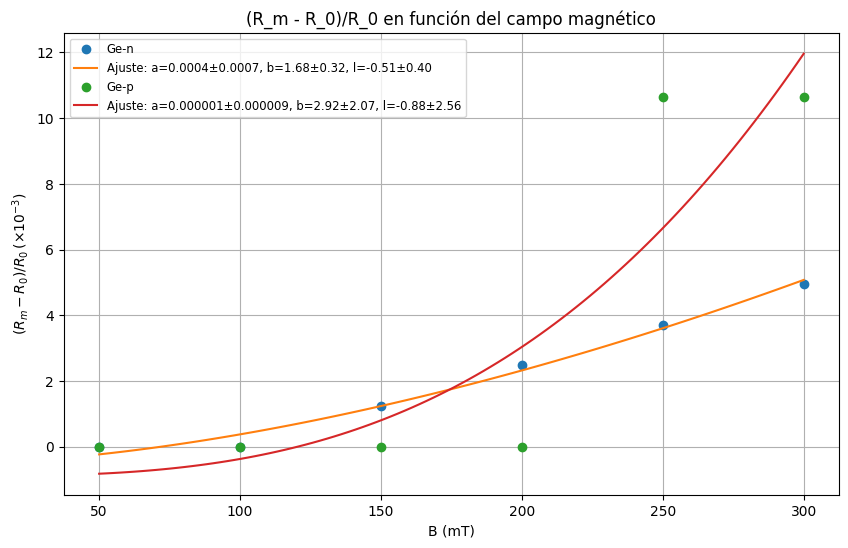

In [13]:
x = np.array([50, 100, 150, 200, 250, 300])
y_1 = np.array([0, 0, 1.24, 2.48, 3.72, 4.97])
y_2 = np.array([0, 0, 0, 0, 10.64, 10.64])

def func(x, a, b, l):
    return a * (x ** b) + l

try:
    params_1, cov_1 = curve_fit(func, x, y_1, p0=[1, 0.5, 0], maxfev=5000)
    params_2, cov_2 = curve_fit(func, x, y_2, p0=[1, 0.5, 0], maxfev=5000)
    
    errors_1 = np.sqrt(np.diag(cov_1))
    errors_2 = np.sqrt(np.diag(cov_2))

    x_fit = np.linspace(50, 300, 100)
    y_fit_1 = func(x_fit, *params_1)
    y_fit_2 = func(x_fit, *params_2)

    plt.figure(figsize=(10, 6))

    plt.plot(x, y_1, 'o', label="Ge-n")
    plt.plot(x_fit, y_fit_1, '-', label=(
        f"Ajuste: a={params_1[0]:.4f}±{errors_1[0]:.4f}, "
        f"b={params_1[1]:.2f}±{errors_1[1]:.2f}, "
        f"l={params_1[2]:.2f}±{errors_1[2]:.2f}"
    ))

    plt.plot(x, y_2, 'o', label="Ge-p")
    plt.plot(x_fit, y_fit_2, '-', label=(
        f"Ajuste: a={params_2[0]:.6f}±{errors_2[0]:.6f}, "
        f"b={params_2[1]:.2f}±{errors_2[1]:.2f}, "
        f"l={params_2[2]:.2f}±{errors_2[2]:.2f}"
    ))

    plt.xlabel("B (mT)")
    plt.ylabel(r"$(R_m - R_0)/R_0 \, (\times 10^{-3})$")
    plt.title("(R_m - R_0)/R_0 en función del campo magnético")
    plt.legend(loc="best", fontsize="small")
    plt.grid(True)

    plt.show()

except RuntimeError as e:
    print(f"No se pudieron encontrar los parámetros óptimos: {e}")
